# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy.stats import norm
from scipy.stats import mode

# Read File

In [2]:
from google.colab import files
df=files.upload()

Saving HCV-Egy-Data.csv to HCV-Egy-Data.csv


In [3]:
# Assigning dataset to a dataframe
df_hcv = pd.read_csv('HCV-Egy-Data.csv')
df_hcv

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3


# Univariate Analysis

In [4]:
#Printing column names 
df_hcv.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [5]:
#Checking for null values
df_hcv.isnull().sum() 
# No missing values identified in the dataset

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [6]:
#Checking for binary data columns
binary_cols=['Gender', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ']

In [7]:
#Checking for class representation within the dataset
for i in range(len(binary_cols)):
  print(df_hcv[binary_cols[i]].value_counts())

1    707
2    678
Name: Gender, dtype: int64
2    714
1    671
Name: Fever, dtype: int64
2    696
1    689
Name: Nausea/Vomting, dtype: int64
1    698
2    687
Name: Headache , dtype: int64
2    696
1    689
Name: Diarrhea , dtype: int64
1    694
2    691
Name: Fatigue & generalized bone ache , dtype: int64
2    694
1    691
Name: Jaundice , dtype: int64
2    698
1    687
Name: Epigastric pain , dtype: int64


In [8]:
non_bin=['Age ', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging']

In [9]:
#Data description
df_hcv.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


# Bivariate Analysis

In [10]:
#Pair plot
import seaborn as sns
#sns.pairplot(df_hcv, vars=df_hcv.columns[:-1])

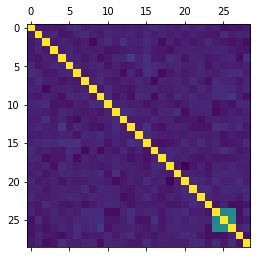

In [11]:
#Correlation plot
X = df_hcv.iloc[:, 0:]
y = df_hcv.iloc[:, 28]
plt.matshow(df_hcv.corr())
plt.show()

In [12]:
#Checking for correlation between variables
from scipy.stats import spearmanr
col_list = df_hcv.columns
col_list = list(col_list)
col_list.pop(27)
col_list.pop()
alpha = 0.05
coef_list = []
column_list = []

##getting collinearity using spearman coefficient because of categorical data
for i in col_list:
    coef, p = spearmanr(df_hcv['Baselinehistological staging'], df_hcv[i])
    if p > alpha:
        print(i, 'is uncorrelated with correlation values', coef)
    else:
        print(i, 'is correlated with correlation value', coef)

    coef_list.append(coef)
    column_list.append(i)

Age  is uncorrelated with correlation values -0.019821004190879822
Gender is uncorrelated with correlation values 0.011584563785409813
BMI is correlated with correlation value -0.05851367001489269
Fever is uncorrelated with correlation values -0.03125985970348066
Nausea/Vomting is correlated with correlation value 0.05467441775816156
Headache  is uncorrelated with correlation values -0.0018225147969065548
Diarrhea  is uncorrelated with correlation values -0.005239864874878057
Fatigue & generalized bone ache  is uncorrelated with correlation values 0.014553577610302458
Jaundice  is uncorrelated with correlation values 0.019968732160764908
Epigastric pain  is uncorrelated with correlation values -0.05139044026609895
WBC is uncorrelated with correlation values 0.018385685512493324
RBC is uncorrelated with correlation values 0.009645008064171158
HGB is uncorrelated with correlation values 0.003447249902659829
Plat is uncorrelated with correlation values -0.01748898073563276
AST 1 is uncorr

<BarContainer object of 27 artists>

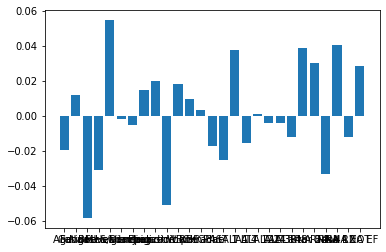

In [13]:
plt.bar(column_list,coef_list)

In [14]:
#Variables with high correlation coefficient
['BMI', 'Nausea/Vomiting', 'Epigastric pain', 'ALT 1', 'ALT after 24 w', 'RNA 4', 'RNA 12','RNA EF']

['BMI',
 'Nausea/Vomiting',
 'Epigastric pain',
 'ALT 1',
 'ALT after 24 w',
 'RNA 4',
 'RNA 12',
 'RNA EF']

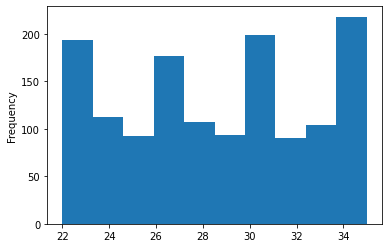

In [15]:
df_hcv['BMI'].plot(kind='hist')

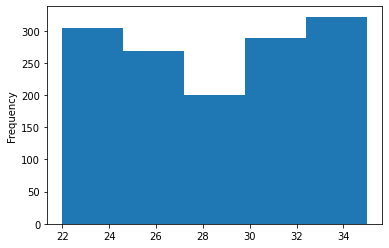

In [16]:
df_hcv['BMI'].plot(kind='hist',bins = 5)

0       56
1       46
2       57
3       49
4       59
        ..
1380    44
1381    55
1382    42
1383    52
1384    55
Name: Age , Length: 1385, dtype: int64


(array([295., 278., 261., 267., 284.]),
 array([32. , 37.8, 43.6, 49.4, 55.2, 61. ]),
 <a list of 5 Patch objects>)

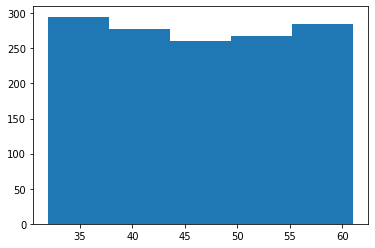

In [17]:
#Age
b = df_hcv.iloc[:, 0]
print(b)
plt.hist(b, bins =5, )

# Pre-processing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


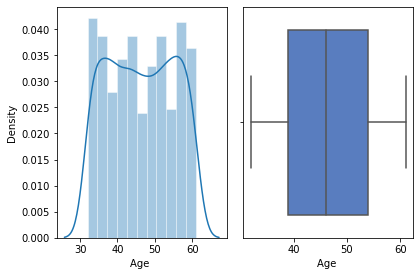

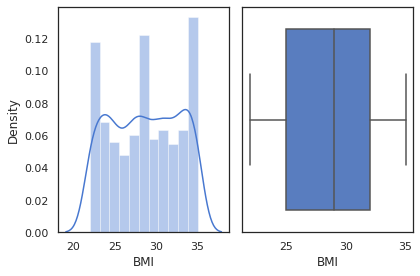

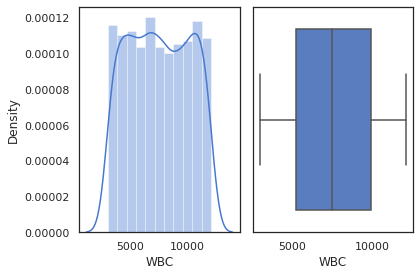

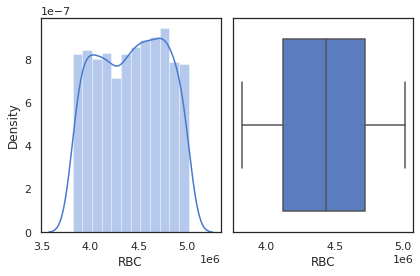

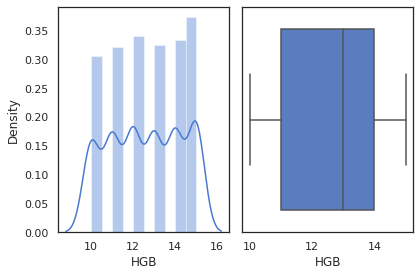

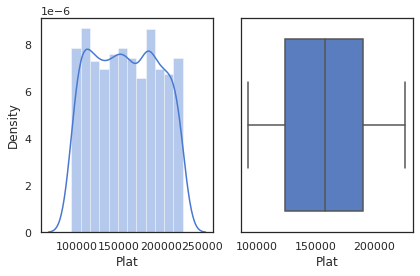

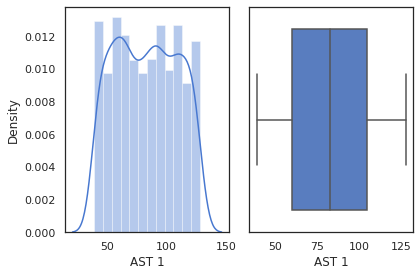

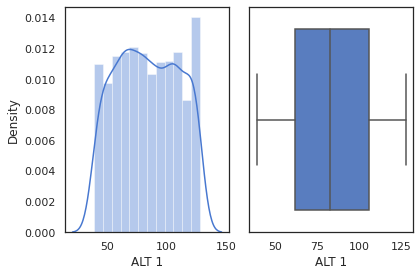

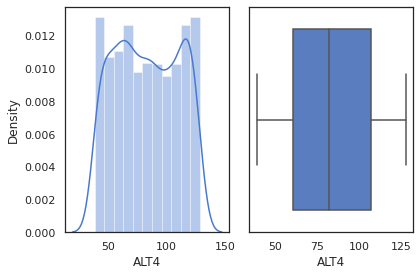

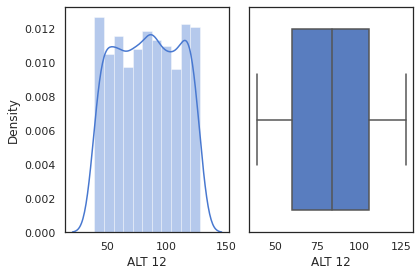

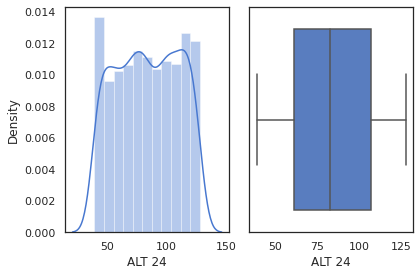

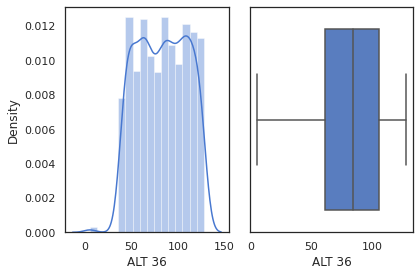

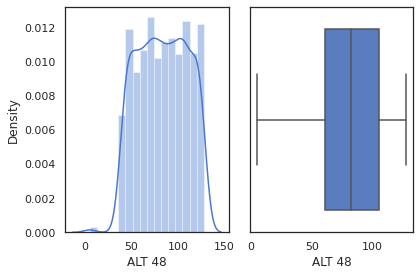

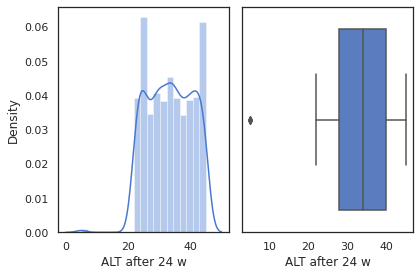

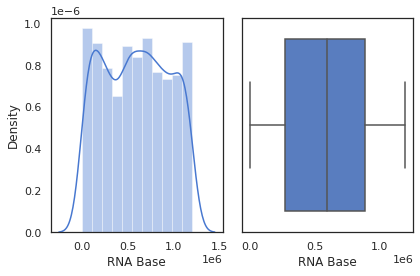

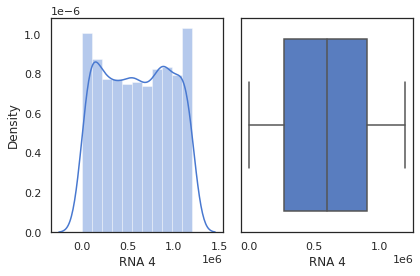

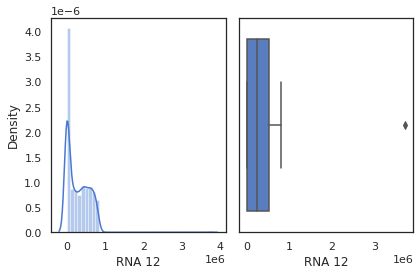

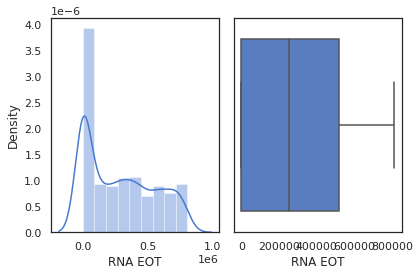

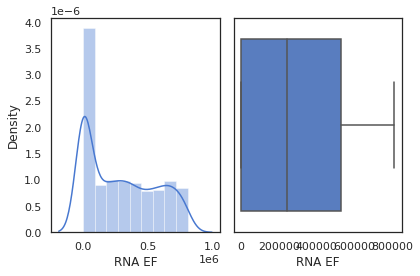

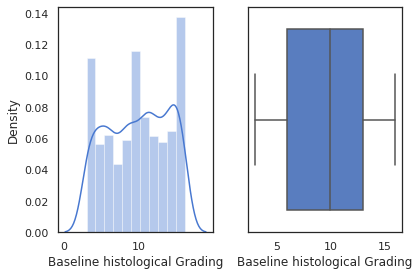

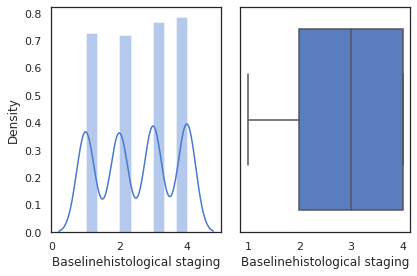

In [18]:
#Data distribution and checking for outliers
for j in range(len(non_bin)):
  plt.rcParams["figure.autolayout"] = True
  f, axes = plt.subplots(1, 2)
  sns.set(color_codes=True)
  sns.set(style="white", palette="muted")
  #print(df_hcv[non_bin[j]])
  sns.distplot(df_hcv[non_bin[j]],ax=axes[0])
  #Boxplot
  sns.boxplot(df_hcv[non_bin[j]],ax=axes[1])

In [19]:
#Outlier treatment
#Outliers in ALT after 24 w
filter = df_hcv['ALT after 24 w'].values > 22
df_hcv = df_hcv[filter]
df_hcv
#Outliers in RNA 12
df_hcv = df_hcv[df_hcv['RNA 12'] < 1000000]
df_hcv

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
5,58,2,22,2,2,2,1,2,2,1,11785,3882456.0,15,131228.0,66,104,121.0,96,65,73,114,29,1157452,1086852,5,5,5,4,4
6,42,2,26,1,1,2,2,2,2,2,11620,4747333.0,12,177261.0,78,57,113.0,118,107,84,80,28,325694,1034008,275095,214566,635157,12,4
7,48,2,30,1,1,2,2,1,1,2,7335,4405941.0,11,216176.0,119,112,80.0,127,45,96,53,39,641129,72050,787295,370605,506296,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3


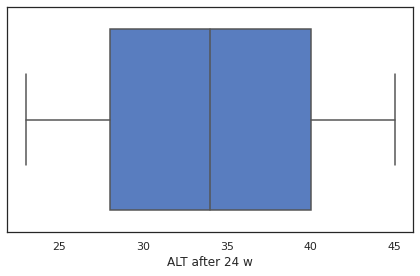

In [20]:
sns.boxplot(df_hcv['ALT after 24 w'])

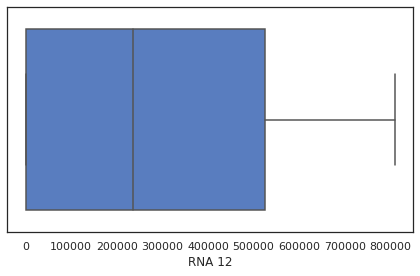

In [21]:
sns.boxplot(df_hcv['RNA 12'])

In [22]:
df_hcv_m=df_hcv.copy()

In [23]:
# Dropping columns for Multi-Collinearity greater than 80%
df_hcv_m=df_hcv.copy()
drop_columns = 0
collinearity=0.80 #set Collinearity

for i in range(0, len(df_hcv_m.columns)-1):
    for j in range(i+1, len(df_hcv_m.columns)-1):
        if((df_hcv_m.iloc[:, i].corr(df_hcv_m.iloc[:, j]) > collinearity) or (df_hcv_m.iloc[:, i].corr(df_hcv_m.iloc[:, j]) < -(collinearity))):
            print("Correlation between ",  df_hcv_m.columns[i], "and ",
                  df_hcv_m.columns[j], "high. Hence dropping ", df_hcv_m.columns[i])
            drop_columns+=1
            df_hcv_m = df_hcv_m.drop(columns=df_hcv_m.columns[i])
            break
if(drop_columns<1):
  print("No Collinearity between varaibles greater than",collinearity*100,"%. So no variables dropped.")


No Collinearity between varaibles greater than 80.0 %. So no variables dropped.


In [24]:
df_hcv_m

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
5,58,2,22,2,2,2,1,2,2,1,11785,3882456.0,15,131228.0,66,104,121.0,96,65,73,114,29,1157452,1086852,5,5,5,4,4
6,42,2,26,1,1,2,2,2,2,2,11620,4747333.0,12,177261.0,78,57,113.0,118,107,84,80,28,325694,1034008,275095,214566,635157,12,4
7,48,2,30,1,1,2,2,1,1,2,7335,4405941.0,11,216176.0,119,112,80.0,127,45,96,53,39,641129,72050,787295,370605,506296,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,7044,4957174.0,15,202520.0,122,59,78.0,106,127,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,6207,4636951.0,10,115776.0,128,102,65.0,99,108,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,4913,4122038.0,14,128354.0,61,93,123.0,61,116,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,7257,4241990.0,10,205908.0,70,97,104.0,74,47,48,81,43,139872,76161,515730,2460,696074,15,3


# Response Variable Binning

In [25]:
# Converting the response variable into 0 and 1

df_hcv_m.iloc[:,-1]=np.where(df_hcv_m.iloc[:,-1]<3,0 ,1)

In [26]:
df_hcv_m['Baselinehistological staging'].value_counts()

# As classes are fairly balanced Oversampling is not needed

1    685
0    639
Name: Baselinehistological staging, dtype: int64

# Split Data

In [27]:
# Splitting data into test and train
X_train,X_test,y_train,y_test=train_test_split(df_hcv_m.iloc[:,0:-1],df_hcv_m.iloc[:,-1],test_size=0.3,random_state=0)

# Standard Scaling

In [28]:
class Scaling:
    def __init__ (self, X_train,X_test,y_train,y_test):
      self.X_train=X_train
      self.X_test=X_test
      self.y_train=y_train
      self.y_test=y_test
      self.X_train, self.mean, self.std = self.normalize(self.X_train) 
      self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std) 
                    
    #def add_x0(self,X):
     # return np.column_stack([np.ones([X.shape[0], 1]),X])
    def normalize(self, X):
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
    
      X_norm = (X - mean) / std
      #X_norm = self.add_x0(X_norm)
      return X_norm, mean, std
    
    #normalize test
    def normalizeTestData(self, X, train_mean, train_std):
      X_norm = (X - train_mean) / train_std 
      #X_norm = self.add_x0(X_norm)
      return X_norm

    def train_test(self):
      return self.X_train
    
    def test(self):
      return self.X_test


In [29]:
# Invoke Scaling
sc=Scaling(X_train, X_test, y_train,y_test)
X_train=sc.train_test()
X_test=sc.test()

# Logistic Regression

In [30]:
class LogisticRegression:
    
    def __init__ (self, learningRate, tolerance,train_df,test_df,y_train,y_test,ri=[],maxIteration=1000):
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.ri=ri
        self.train_df=train_df
        self.test_df=test_df
        self.y_train=y_train
        self.y_test=y_test

    
    def datasetRead(self):
      train_df, test_df = np.array(X_train, dtype=np.float64), np.array(X_test, dtype=np.float64) 
      train_df_y, test_df_y = np.array(y_train, dtype=np.float64), np.array(y_test, dtype=np.float64)   
    #X_train, y_train= train_df[:,:], train_df[:,]
    #X_test, y_test= test_df[:,1:], test_df[:,0]
      return (train_df, test_df, train_df_y, test_df_y)

    def add_x0(self,X):
      return np.column_stack([np.ones([X.shape[0], 1]),X])
    def normalize(self, X):
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
    
      X_norm = (X - mean) / std
      X_norm = self.add_x0(X_norm)
      return X_norm, mean, std
    
    
    #normalize test
    def normalizeTestData(self, X, train_mean, train_std):
      X_norm = (X - train_mean) / train_std 
      X_norm = self.add_x0(X_norm)
      return X_norm
 
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) #negative log likelihood
        cost=pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad   # We get gradient per column
    
    def gradientDescent(self,X,y):
        
        cost_sequences=[]
        last_cost=float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w=self.w-self.learningRate* self.gradient(X,y)
            cur_cost=self.costFunction(X,y)
            diff=last_cost - cur_cost
            
            last_cost=cur_cost
            cost_sequences.append(cur_cost)
            
            if diff<self.tolerance:
                print("The model stoppped  - Converged")
                break
                
        #self.plot_cost(cost_sequences)
        return
    
    def predict(self,X):
        sig=self.sigmoid(X.dot(self.w))
        return np.around(sig) # if above 0.5 then 1 else 0
    
    def evaluate(self,y,y_hat):
        y=(y==1)
        y_hat=(y_hat == 1)
        accuracy =(y == y_hat).sum() / y.size
        precision=(y & y_hat).sum()/y_hat.sum() # Total postive vs total
        recall=(y & y_hat).sum() / y.sum()
        return accuracy,precision,recall
    
    def remove_index(self,arr,X_train,y_train):
        ind=arr
        for i in arr:
            #print(i)
            X_train,y_train=np.delete(X_train,i, axis=0),np.delete(y_train,i, axis=0)
        return X_train,y_train
    
    def runModel(self):
        self.X_train,self.X_test,self.y_train,self.y_test = self.datasetRead()
        #self.X_train, self.mean, self.std = self.normalize(self.X_train) 
        #self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std) 
        if(len(self.ri)>0):
            self.X_train,self.y_train=self.remove_index(self.ri,self.X_train,self.y_train)
        print("Solving using gradient descent")
        self.w=np.ones(self.X_train.shape[1],dtype =np.float64) * 0
        self.gradientDescent(self.X_train,self.y_train)
        
        #print(self.w)
        y_hat_train=self.predict(self.X_train)
        accuracy,precision,recall =self.evaluate(self.y_train,y_hat_train)
        print("Accuracy:",np.round(accuracy,2))
        print("Precision:", np.round(precision,2))
        print("Recall:", np.round(recall,2))
        #print(y_hat_train, "check", y_train )

                #print(self.w)
        y_hat_test=self.predict(self.X_test)
        accuracy,precision,recall =self.evaluate(self.y_test,y_hat_test)
        print("\n\nEvaluate for Testing data: \n")
        print("Accuracy:",np.round(accuracy,2))
        print("Precision:", np.round(precision,2))
        print("Recall:", np.round(recall,2))

In [31]:
for k in [0.1,0.2,0.3,0.4,0.5]:
  print("\nTest size:", k*100,"%\n")
  X_train,X_test,y_train,y_test=train_test_split(df_hcv_m.iloc[:,0:-1],df_hcv_m.iloc[:,-1],test_size=k,random_state=0)
  # Invoke Scaling
  sc=Scaling(X_train, X_test, y_train,y_test)
  X_train=sc.train_test()
  X_test=sc.test()
  lr=LogisticRegression(tolerance=0.0,learningRate=0.1e-5,maxIteration=10000,train_df=X_train,test_df=X_test,y_train=y_train,y_test=y_test)
  lr.runModel()


Test size: 10.0 %

Solving using gradient descent


100%|██████████| 10000/10000 [00:02<00:00, 4461.23it/s]


Accuracy: 0.57
Precision: 0.59
Recall: 0.58


Evaluate for Testing data: 

Accuracy: 0.46
Precision: 0.48
Recall: 0.37

Test size: 20.0 %

Solving using gradient descent


100%|██████████| 10000/10000 [00:01<00:00, 5126.38it/s]


Accuracy: 0.58
Precision: 0.6
Recall: 0.58


Evaluate for Testing data: 

Accuracy: 0.48
Precision: 0.49
Recall: 0.44

Test size: 30.0 %

Solving using gradient descent


100%|██████████| 10000/10000 [00:01<00:00, 5571.03it/s]


Accuracy: 0.58
Precision: 0.6
Recall: 0.58


Evaluate for Testing data: 

Accuracy: 0.48
Precision: 0.51
Recall: 0.46

Test size: 40.0 %

Solving using gradient descent


100%|██████████| 10000/10000 [00:01<00:00, 6031.78it/s]


Accuracy: 0.58
Precision: 0.59
Recall: 0.57


Evaluate for Testing data: 

Accuracy: 0.5
Precision: 0.53
Recall: 0.48

Test size: 50.0 %

Solving using gradient descent


100%|██████████| 10000/10000 [00:01<00:00, 7107.22it/s]

Accuracy: 0.58
Precision: 0.59
Recall: 0.57


Evaluate for Testing data: 

Accuracy: 0.51
Precision: 0.55
Recall: 0.47


In [32]:
# Run Logistic model
#lr=LogisticRegression(tolerance=0.0,learningRate=0.1e-5,maxIteration=10000,train_df=X_train,test_df=X_test,y_train=y_train,y_test=y_test)
#lr.runModel()

In [33]:
#Implementation of logistic regression using Scikit learn

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

model = LogisticRegression(random_state=0).fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

#print(model.coef_)

              precision    recall  f1-score   support

           0       0.48      0.53      0.50       310
           1       0.54      0.48      0.51       352

    accuracy                           0.51       662
   macro avg       0.51      0.51      0.51       662
weighted avg       0.51      0.51      0.51       662



# Hard Margin SVM

In [34]:
class HardMarginSVM:
    
    def __init__(self, learning_rate = 0.00001, lamda = 0.001, n_iters=100):
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None

        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y<=0,-1,1) #convert y values to -1 and +1
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.learning_rate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.learning_rate *(2 * self.lamda * self.w - np.dot(x_i, y_[idx]))
                    self.b = self.b - self.learning_rate * (-y_[idx])
    
    def predict(self, X,Y):
        approx = np.dot(X,self.w) + self.b
        y_hat_test=np.sign(approx)
        accuracy,precision,recall =self.evaluate(Y,y_hat_test)
        #print("Evaluate for data: \n")
        print("Accuracy:",np.round(accuracy,2))
        print("Precision:", np.round(precision,2))
        print("Recall:", np.round(recall,2))
        #return accuracy,precision,recall
    
    def evaluate(self,y,y_hat):
        y=(y==1)
        y_hat=(y_hat == 1)
        accuracy =(y == y_hat).sum() / y.size
        precision=(y & y_hat).sum()/y_hat.sum() # Total postive vs total
        recall=(y & y_hat).sum() / y.sum()
        return accuracy, precision,recall


In [35]:
#y_train=np.where(y_train<1,-1 ,1)
#y_test=np.where(y_test<1,-1 ,1)

In [36]:
# Training Metrics
for k in [0.1,0.2,0.3,0.4,0.5]:
  print("\nTest size:", k*100,"%\n")
  X_train,X_test,y_train,y_test=train_test_split(df_hcv_m.iloc[:,0:-1],df_hcv_m.iloc[:,-1],test_size=k,random_state=0)
  # Invoke Scaling
  sc=Scaling(X_train, X_test, y_train,y_test)
  X_train=sc.train_test()
  X_test=sc.test()
  clf = HardMarginSVM()
  print("Training Data") 
  clf.fit(np.array(X_train),np.array(y_train))
  clf.predict(np.array(X_train),np.array(y_train))
  # Test Metrics 
  print("\nTesting Data")
  clf.predict(np.array(X_test),np.array(y_test))


Test size: 10.0 %

Training Data
Accuracy: 0.56
Precision: 0.57
Recall: 0.63

Testing Data
Accuracy: 0.48
Precision: 0.51
Recall: 0.46

Test size: 20.0 %

Training Data
Accuracy: 0.57
Precision: 0.57
Recall: 0.64

Testing Data
Accuracy: 0.47
Precision: 0.49
Recall: 0.51

Test size: 30.0 %

Training Data
Accuracy: 0.58
Precision: 0.58
Recall: 0.64

Testing Data
Accuracy: 0.48
Precision: 0.5
Recall: 0.5

Test size: 40.0 %

Training Data
Accuracy: 0.58
Precision: 0.58
Recall: 0.6

Testing Data
Accuracy: 0.52
Precision: 0.55
Recall: 0.5

Test size: 50.0 %

Training Data
Accuracy: 0.59
Precision: 0.59
Recall: 0.59

Testing Data
Accuracy: 0.5
Precision: 0.53
Recall: 0.47


# Naive Bayes

In [37]:
# Chaitanya Swan
class NaiveBayes:

  def __init__(self, X_train,X_test,y_train,y_test):
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
    self.y_hat_arr=[]

  def fitDistribution(self, data):
    mu = np.mean(data)
    sigma = np.std(data)

    dist = norm(mu, sigma)
    return dist

  def probability(self, X, prior, dist1):
    self.distn_pdf=prior
    for j in range(len(X)):
      self.distn_pdf=self.distn_pdf * (dist1[j].pdf(X[j]))
    return self.distn_pdf

  def runModel(self):
    #self.trainTestSplit()
    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    #Calculate priors
    self.prior_y0 = len(self.X0_train)/len(self.X_train)
    self.prior_y1 = len(self.X1_train)/len(self.X_train)

    #Create PDFs for class 0
    self.dist_Xny0=[]
    self.dist_Xny1=[]
    for i in range(self.X_train.shape[1]):

      self.dist_Xny0.append(self.fitDistribution(self.X0_train[:,i]))
      self.dist_Xny1.append(self.fitDistribution(self.X1_train[:,i]))

  def predict(self):
    y_hat_train_arr=[]
    y_hat_test_arr=[]

    for sample, target in zip(self.X_train, self.y_train):
      #py0 = self.probability(sample, self.prior_y0, self.dist_X0y0, self.dist_X1y0,self.dist_X2y0)
      #py1 = self.probability(sample, self.prior_y1, self.dist_X0y1, self.dist_X1y1,self.dist_X2y1)
      py0 = self.probability(sample, self.prior_y0, self.dist_Xny0)
      py1 = self.probability(sample, self.prior_y1, self.dist_Xny1)
      y_hat_train= np.argmax([py0*100, py1*100])
      y_hat_train_arr.append(y_hat_train)
    accuracy,precision,recall =self.evaluate(self.y_train,np.where(np.array(y_hat_train_arr)==1,True ,False))
    print("Evaluate for trainning data: \n")
    print("Accuracy:",np.round(accuracy,2))
    print("Precision:", np.round(precision,2))
    print("Recall:", np.round(recall,2))

    for sample, target in zip(self.X_test, self.y_test):
       py0 = self.probability(sample, self.prior_y0, self.dist_Xny0)
       py1 = self.probability(sample, self.prior_y1, self.dist_Xny1)
       y_hat_test= np.argmax([py0*100, py1*100])
       y_hat_test_arr.append(y_hat_test)
    accuracy,precision,recall =self.evaluate(self.y_test,np.where(np.array(y_hat_test_arr)==1,True ,False))
    print("\n\nEvaluate for Testing data: \n")
    print("Accuracy:",np.round(accuracy,2))
    print("Precision:", np.round(precision,2))
    print("Recall:", np.round(recall,2))

  def evaluate(self,y,y_hat):
        y=(y==1)
        y_hat=(y_hat == 1)
        accuracy =(y == y_hat).sum() / y.size
        #print(y_hat)
        precision=(y & y_hat).sum()/y_hat.sum() # Total postive vs total  
        recall=(y & y_hat).sum() / y.sum()
        return accuracy, precision,recall



In [38]:
# Call Naive Bayes
for k in [0.1,0.2,0.3,0.4,0.5]:
  print("\n\nTest size:", k*100,"%\n")
  X_train,X_test,y_train,y_test=train_test_split(df_hcv_m.iloc[:,0:-1],df_hcv_m.iloc[:,-1],test_size=k,random_state=0)
  # Invoke Scaling
  sc=Scaling(X_train, X_test, y_train,y_test)
  X_train=sc.train_test()
  X_test=sc.test()
  nb=NaiveBayes(np.array(X_train, dtype=np.float64),np.array(X_test, dtype=np.float64),np.array(y_train, dtype=np.float64),np.array(y_test, dtype=np.float64))
  nb.runModel()
  nb.predict()



Test size: 10.0 %

Evaluate for trainning data: 

Accuracy: 0.56
Precision: 0.57
Recall: 0.63


Evaluate for Testing data: 

Accuracy: 0.46
Precision: 0.48
Recall: 0.44


Test size: 20.0 %

Evaluate for trainning data: 

Accuracy: 0.58
Precision: 0.58
Recall: 0.65


Evaluate for Testing data: 

Accuracy: 0.46
Precision: 0.48
Recall: 0.5


Test size: 30.0 %

Evaluate for trainning data: 

Accuracy: 0.59
Precision: 0.6
Recall: 0.65


Evaluate for Testing data: 

Accuracy: 0.48
Precision: 0.5
Recall: 0.51


Test size: 40.0 %

Evaluate for trainning data: 

Accuracy: 0.59
Precision: 0.59
Recall: 0.6


Evaluate for Testing data: 

Accuracy: 0.49
Precision: 0.52
Recall: 0.48


Test size: 50.0 %

Evaluate for trainning data: 

Accuracy: 0.61
Precision: 0.61
Recall: 0.61


Evaluate for Testing data: 

Accuracy: 0.5
Precision: 0.54
Recall: 0.48


# KNN

In [39]:
class KNN:
  def __init__(self, neighbors,X_train,X_test,y_train,y_test):
    self.neighbors = neighbors
    self.X_train=X_train
    self.X_test=X_test
    self.y_train=y_train
    self.y_test=y_test
    
  def datasetRead(self):
    train_df, test_df = np.array(X_train, dtype=np.float64), np.array(X_test, dtype=np.float64) 
    train_df_y, test_df_y = np.array(y_train, dtype=np.float64), np.array(y_test, dtype=np.float64)   
    #X_train, y_train= train_df[:,:], train_df[:,]
    #X_test, y_test= test_df[:,1:], test_df[:,0]
    return (train_df, test_df, train_df_y, test_df_y)

  def add_x0(self,X):
    return np.column_stack([np.ones([X.shape[0], 1]),X])

  def normalize(self, X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    X_norm = self.add_x0(X_norm)
    return X_norm, mean, std
    
    
    #normalize test
  def normalizeTestData(self, X, train_mean, train_std):
    X_norm = (X - train_mean) / train_std 
    X_norm = self.add_x0(X_norm)
    return X_norm
  
#Euclidean Distance
  def eucledian(self,p1,p2):
      dist = np.sqrt(np.sum((p1-p2)**2))
      return dist

  def evaluate(self,y,y_hat):
    y=(y==1)
    
    y_hat=(y_hat == 1)
    #print(y, "  ",y_hat)
    accuracy =(y == y_hat).sum() / y.size
    precision=(y & y_hat).sum()/y_hat.sum() # Total postive vs total
    recall=(y & y_hat).sum() / y.sum()
    return accuracy, precision,recall

  def runModel(self):
    self.X_train,self.X_test,self.y_train,self.y_test = self.datasetRead()
    #self.X_train, self.mean, self.std = self.normalize(self.X_train) 
    #self.X_test = self.normalizeTestData(self.X_test, self.mean, self.std) 

    predicted = []

    for test_row in range(len(self.X_test)):
      dist_list=[]
      for train_row in range(len(self.X_train)):
        distances = self.eucledian(self.X_train[train_row] ,self.X_test[test_row])
        dist_list.append(distances)
      dist_list = np.array(dist_list)

      dist = np.argsort(dist_list)[:self.neighbors]

      target = self.y_train[dist]
         
      outcome = mode(target)
      #y_hat_train=self.predict(self.X_train)

      predicted.append(outcome.mode[0])
    #print(predicted)
    #print(y_test)
    accuracy,precision,recall =self.evaluate(np.array(self.y_test, dtype=np.float64),np.array(predicted, dtype=np.float64))
    print("Evaluate for Test data: \n")
    print("Accuracy:",np.round(accuracy,2))
    print("Precision:", np.round(precision,2))
    print("Recall:", np.round(recall,2))
    return accuracy

In [40]:
X_train,X_test,y_train,y_test=train_test_split(df_hcv_m.iloc[:,0:-1],df_hcv_m.iloc[:,-1],test_size=0.3,random_state=0)
sc=Scaling(X_train, X_test, y_train,y_test)
X_train=sc.train_test()
X_test=sc.test()

In [41]:
# KNN execution
for i in range(10):
  print('\nNeighbours',i+1)
  k=KNN(i+1,X_train,X_test,y_train,y_test)
  k.runModel()


Neighbours 1
Evaluate for Test data: 

Accuracy: 0.53
Precision: 0.54
Recall: 0.56

Neighbours 2
Evaluate for Test data: 

Accuracy: 0.49
Precision: 0.53
Recall: 0.28

Neighbours 3
Evaluate for Test data: 

Accuracy: 0.5
Precision: 0.52
Recall: 0.53

Neighbours 4
Evaluate for Test data: 

Accuracy: 0.51
Precision: 0.54
Recall: 0.36

Neighbours 5
Evaluate for Test data: 

Accuracy: 0.52
Precision: 0.54
Recall: 0.52

Neighbours 6
Evaluate for Test data: 

Accuracy: 0.52
Precision: 0.55
Recall: 0.41

Neighbours 7
Evaluate for Test data: 

Accuracy: 0.51
Precision: 0.53
Recall: 0.57

Neighbours 8
Evaluate for Test data: 

Accuracy: 0.47
Precision: 0.49
Recall: 0.38

Neighbours 9
Evaluate for Test data: 

Accuracy: 0.5
Precision: 0.52
Recall: 0.52

Neighbours 10
Evaluate for Test data: 

Accuracy: 0.49
Precision: 0.52
Recall: 0.41
